In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
filenames = os.listdir('/kaggle/input/cifar-10-competition-dataset/train/train')
type(filenames)

list

In [3]:
len(filenames)

50000

In [4]:
print(filenames[:5])

['27147.png', '32352.png', '41695.png', '21130.png', '36145.png']


In [5]:
print(filenames[-5:])

['48768.png', '37246.png', '23121.png', '36054.png', '4164.png']


In [6]:
Train = '/kaggle/input/cifar-10-competition-dataset/train'
Train_Label = '/kaggle/input/cifar-10-competition-dataset/trainLabels.csv'
Test = '/kaggle/input/cifar-10-competition-dataset/test'

In [7]:
train_label = pd.read_csv(Train_Label)

In [8]:
train_label.head(5)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [9]:
train_label.tail(5)

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [10]:
train_label[train_label['id'] == 5]

,id,label
4,5,automobile


In [11]:
len(train_label)

50000

In [12]:
train_label['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [13]:
labels_dictionary = {'airplane': 0 , 'automobile': 1 , 'bird': 2 , 'cat': 3 , 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}

**Here Lebels array is created or train_Y, Here labels, such as, airplane/automobiles are converted to endcoded value**

In [14]:
label = [labels_dictionary[i] for i in train_label['label']] #Encoded label array

In [15]:
print(label[:5])
print(label[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [16]:
import cv2
from google.colab.patches import cv2_imshow

In [17]:
img = cv2.imread('/kaggle/input/cifar-10-competition-dataset/train/train/1.png')

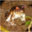

In [18]:
cv2_imshow(img)

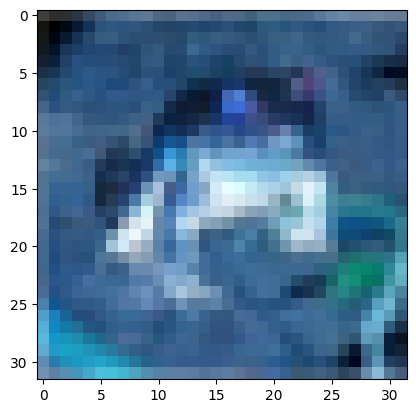

In [19]:
plt.imshow(img)

**Printing first 5data to visualize**

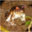

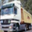

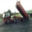

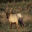

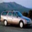

In [20]:
train_image_path = '/kaggle/input/cifar-10-competition-dataset/train/train/'

for i in train_label['id']:
    temp = cv2.imread(train_image_path + str(i) + '.png')
    cv2_imshow(temp)

    if i >= 5:
        break

**image_features are created here**

In [22]:
train_image_path = '/kaggle/input/cifar-10-competition-dataset/train/train/'
img_data = [] #Empty array

for i in train_label['id']:
    temp = cv2.imread(train_image_path + str(i) + '.png')
    img_data.append(temp)

In [23]:
type(img_data)

list

In [24]:
len(img_data)

50000

In [25]:
type(img_data[0])

numpy.ndarray

In [26]:
for i in range(5):
    print(img_data[i].shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [27]:
X = np.array(img_data)
Y = np.array(label)

In [28]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Normalizing the feature values from 0 to 1**

In [33]:
X = X/255

**Splitting train and test data**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 2)

**Building the neural network**

In [30]:
import tensorflow as tf
from tensorflow import keras

*The neural network is created*

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32 , 32 , 3)), #input layer
    keras.layers.Dense(64 , activation = 'relu'), #hidden layer
    keras.layers.Dense(10 , activation = 'softmax'), #output layer
])

*Parameters of the neural network*

In [35]:
model.compile(
    optimizer = 'adam', #the other optimizers are
    loss = 'sparse_categorical_crossentropy', #as labels are encoded so sparse is used
    metrics = ['acc']
)

*Feeding the data to the neural network*

In [36]:
model.fit(X_train , Y_train , validation_split = 0.1 , epochs = 10) #without batch size

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.1040 - loss: 24.6331 - val_acc: 0.1032 - val_loss: 2.3027
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.1000 - loss: 2.3027 - val_acc: 0.1032 - val_loss: 2.3028
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.0967 - loss: 2.3027 - val_acc: 0.0878 - val_loss: 2.3028
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.1007 - loss: 2.3027 - val_acc: 0.0878 - val_loss: 2.3032
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.0976 - loss: 2.3028 - val_acc: 0.0878 - val_loss: 2.3030
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.1047 - loss: 2.3026 - val_acc: 0.1020 - val_loss: 2.3025
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.0983 - loss: 2.3028 - val_acc: 0.1013 - val_loss: 2.3028
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.1020 - loss: 2.3027 - val_acc: 0.0878 - val_loss: 2.3032
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━

In [37]:
model.fit(X_train , Y_train , validation_split = 0.1 , batch_size = 10 , epochs = 10)

Epoch 1/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.0977 - loss: 2.3030 - val_acc: 0.1020 - val_loss: 2.3028
Epoch 2/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.1004 - loss: 2.3027 - val_acc: 0.0878 - val_loss: 2.3028
Epoch 3/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.0978 - loss: 2.3028 - val_acc: 0.1002 - val_loss: 2.3024
Epoch 4/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.0954 - loss: 2.3029 - val_acc: 0.1002 - val_loss: 2.3031
Epoch 5/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 0.0953 - loss: 2.3030 - val_acc: 0.0878 - val_loss: 2.3030
Epoch 6/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.0994 - loss: 2.3028 - val_acc: 0.1013 - val_loss: 2.3031
Epoch 7/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.1010 - loss: 2.3029 - val_acc: 0.1077 - val_loss: 2.3026
Epoch 8/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.1000 - loss: 2.3028 - val_acc: 0.1032 - val_loss: 2.3027
Epoch 9/10
3600/3600 ━━━━━━━━━━━━━━━━━━━

**ResNet50 Model**

In [41]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [45]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256 , 256 , 3))

Upsampling (Resizing images to 256×256)

Feature Extraction (ResNet50)

Flattening (Converting to 1D)

Dense Layers with Batch Normalization and Dropout (For learning patterns)

Output Layer (Classification)

In [52]:
num_of_classes = 10

#It means the codes written below are in sequence, they will build one after another
model = models.Sequential()

#Our dataset image is (32*32)pixeled, so they are upscaled 3times in row and height, 32 * 2 = 64 * 2 = 128 * 2 = 256
#When both row and column are in 256 pixeled, they can now be feeded to ResNet50
model.add(layers.UpSampling2D((2 , 2)))
model.add(layers.UpSampling2D((2 , 2)))
model.add(layers.UpSampling2D((2 , 2)))

#used ResNet50 as pretrained model 
#Pretrained means the neuron's weights and biases are optimized on a huge size dataset like imagenet. Now we will use the already trained weight and biases
model.add(convolutional_base)

#All the layers are converted to a single row vector
model.add(layers.Flatten())

#Inputs are normalized, but after input layer the hidden layers input values may not be normalized, batchnormalization normalizes the values in the hidden layer
#Batchnormalization speeds up the calculation because data gets smaller
#Batchnormalization must be kept before Dense layer
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu')) #Fully connected layers of 128 neurons

#Some layers are turned to zero
#50% neurons are randomly deactivated
model.add(layers.Dropout(0.5)) 


model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))


model.add(layers.BatchNormalization())

#For binary classification sigmoid would be used
#Softmax is probability of classes > 2
model.add(layers.Dense(num_of_classes, activation = 'softmax')) #Output Layer

In [57]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [60]:
history = model.fit(X_train , Y_train , validation_split = 0.1 , epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - accuracy: 0.9809 - loss: 0.1385 - val_accuracy: 0.9452 - val_loss: 0.2175
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - accuracy: 0.9839 - loss: 0.1221 - val_accuracy: 0.9485 - val_loss: 0.2038
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - accuracy: 0.9844 - loss: 0.1130 - val_accuracy: 0.9510 - val_loss: 0.2025
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - accuracy: 0.9876 - loss: 0.0947 - val_accuracy: 0.9482 - val_loss: 0.2129
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - accuracy: 0.9880 - loss: 0.0899 - val_accuracy: 0.9510 - val_loss: 0.2013
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - accuracy: 0.9887 - loss: 0.0797 - val_accuracy: 0.9480 - val_loss: 0.2134
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - accuracy: 0.9900 - loss: 0.0724 - val_accuracy: 0.9498 - val_loss: 0.2219
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - ac

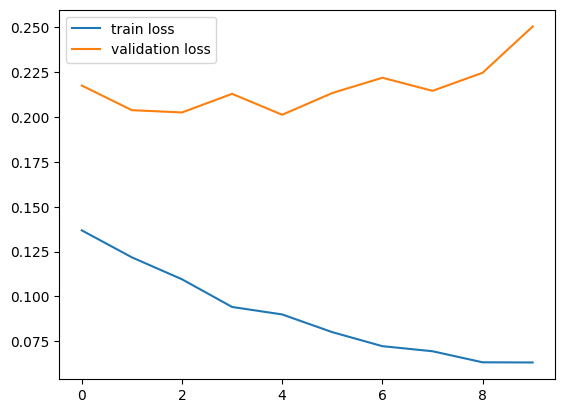

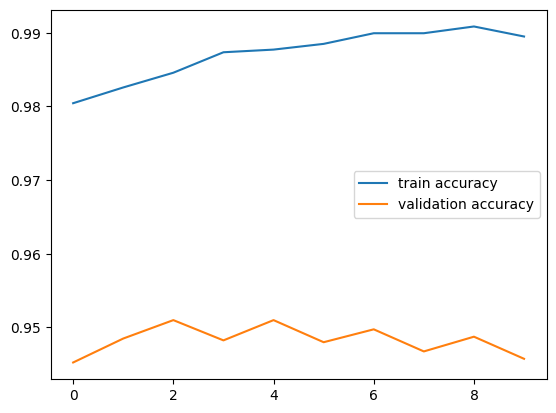

In [67]:
h = history

#Plotting loss value
plt.plot(h.history['loss'] , label = 'train loss')
plt.plot(h.history['val_loss'] , label = 'validation loss')
plt.legend()
plt.show()

#Plotting accuracy value
plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()